# **TMBD Exploratory Data Analysis**

_John Andrew Dixon_

---

##### **Imports**

In [53]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### **Data Load**

In [54]:
movies_2000 = pd.read_csv("Data/final_tmdb_data_2000.csv.gz")
movies_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1235 non-null   object 
 1   adult                  1234 non-null   float64
 2   backdrop_path          679 non-null    object 
 3   belongs_to_collection  113 non-null    object 
 4   budget                 1234 non-null   float64
 5   genres                 1234 non-null   object 
 6   homepage               64 non-null     object 
 7   id                     1234 non-null   float64
 8   original_language      1234 non-null   object 
 9   original_title         1234 non-null   object 
 10  overview               1212 non-null   object 
 11  popularity             1234 non-null   float64
 12  poster_path            1112 non-null   object 
 13  production_companies   1234 non-null   object 
 14  production_countries   1234 non-null   object 
 15  rele

In [55]:
movies_2001 = pd.read_csv("Data/final_tmdb_data_2001.csv.gz")
movies_2001.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                1329 non-null   object 
 1   adult                  1328 non-null   float64
 2   backdrop_path          711 non-null    object 
 3   belongs_to_collection  93 non-null     object 
 4   budget                 1328 non-null   float64
 5   genres                 1328 non-null   object 
 6   homepage               109 non-null    object 
 7   id                     1328 non-null   float64
 8   original_language      1328 non-null   object 
 9   original_title         1328 non-null   object 
 10  overview               1299 non-null   object 
 11  popularity             1328 non-null   float64
 12  poster_path            1193 non-null   object 
 13  production_companies   1328 non-null   object 
 14  production_countries   1328 non-null   object 
 15  rele

---

## **Combine DataFrames & Save**

In [56]:
# Combine the DataFrames
final_df = pd.concat([movies_2000, movies_2001])
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2564 entries, 0 to 1328
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2564 non-null   object 
 1   adult                  2562 non-null   float64
 2   backdrop_path          1390 non-null   object 
 3   belongs_to_collection  206 non-null    object 
 4   budget                 2562 non-null   float64
 5   genres                 2562 non-null   object 
 6   homepage               173 non-null    object 
 7   id                     2562 non-null   float64
 8   original_language      2562 non-null   object 
 9   original_title         2562 non-null   object 
 10  overview               2511 non-null   object 
 11  popularity             2562 non-null   float64
 12  poster_path            2305 non-null   object 
 13  production_companies   2562 non-null   object 
 14  production_countries   2562 non-null   object 
 15  rele

In [57]:
# Define the path to the file.
FILE = "Data/tmdb_results_combined.csv.gz"
# Check if it exists
file_exists = os.path.isfile(FILE)
# If the file does not exist, create it with pandas
if not file_exists:
    final_df.to_csv(FILE, compression="gzip", index=False)

In [58]:
# Verify it correctly saved by reloading the data via the saved file path
final_df = pd.read_csv("Data/tmdb_results_combined.csv.gz")
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2564 entries, 0 to 2563
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2564 non-null   object 
 1   adult                  2562 non-null   float64
 2   backdrop_path          1390 non-null   object 
 3   belongs_to_collection  206 non-null    object 
 4   budget                 2562 non-null   float64
 5   genres                 2562 non-null   object 
 6   homepage               173 non-null    object 
 7   id                     2562 non-null   float64
 8   original_language      2562 non-null   object 
 9   original_title         2562 non-null   object 
 10  overview               2511 non-null   object 
 11  popularity             2562 non-null   float64
 12  poster_path            2305 non-null   object 
 13  production_companies   2562 non-null   object 
 14  production_countries   2562 non-null   object 
 15  rele

## **Exploratory Data Analysis**

Let's first see how many movies have valid financial info:

In [59]:
# Get the number of movies that had valid budget data
valid_revenue = pd.DataFrame({"Valid Revenue (>$0)": final_df["revenue"] > 0})
# Get the number of movies that had valid revenue data
valid_budget = pd.DataFrame({"Valid Budget (>$0)": final_df["budget"] > 0})

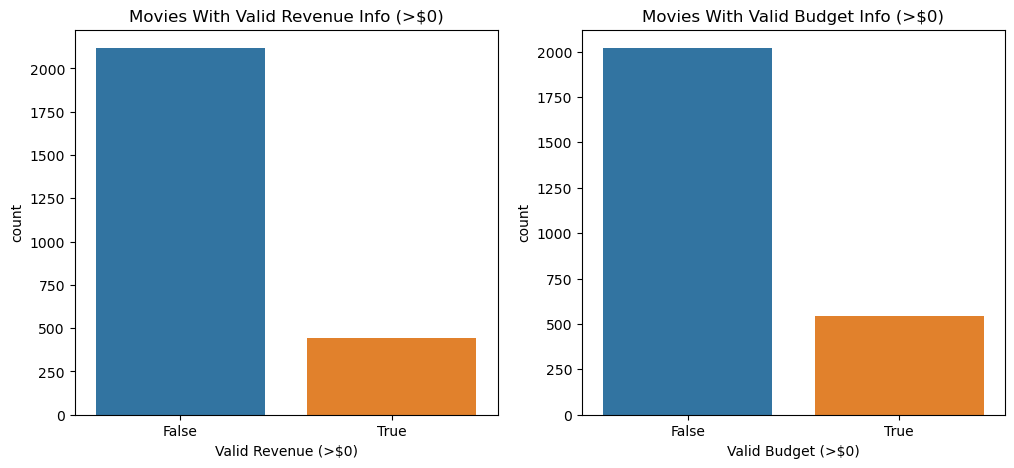

In [65]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.countplot(data=valid_revenue, x="Valid Revenue (>$0)", ax=axes[0]).set_title("Movies With Valid Revenue Info (>$0)")
sns.countplot(data=valid_budget, x="Valid Budget (>$0)", ax=axes[1]).set_title("Movies With Valid Budget Info (>$0)");

Most of the movies gathered from the TMDb API have invalid revenue and or budget info. With that in mind, I'll only consider movies that hav valid financial info going forward: